# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

#### Following code checks Tensorflow version and GPU usage

In [1]:
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.2.0
Default GPU Device: /gpu:0


---
## Step 0: Load The Data

In [6]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file='traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
import numpy as np

### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = np.array(X_train[0]).shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))
sign_classes, class_indices, class_counts = np.unique(y_train, return_index = True, return_counts = True)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

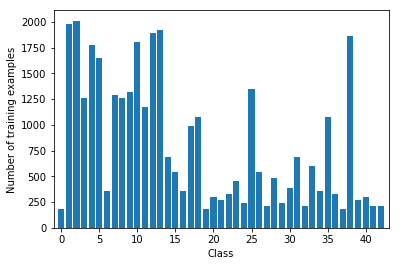

In [23]:
### Data exploration visualization code goes here.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

plt.bar( np.arange(n_classes), class_counts, align='center' )
plt.xlabel('Class')
plt.ylabel('Number of training examples')
plt.xlim([-1, n_classes])
plt.show()
plt.savefig('assets/bar_chart.png')

1
1    Speed limit (30km/h)
Name: SignName, dtype: object


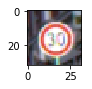

In [7]:
import random
import pandas as pd
df = pd.read_csv('signnames.csv')

index = random.randint(0, n_train)
image = train['features'][index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])
print(df[df['ClassId']==y_train[index]]['SignName'])

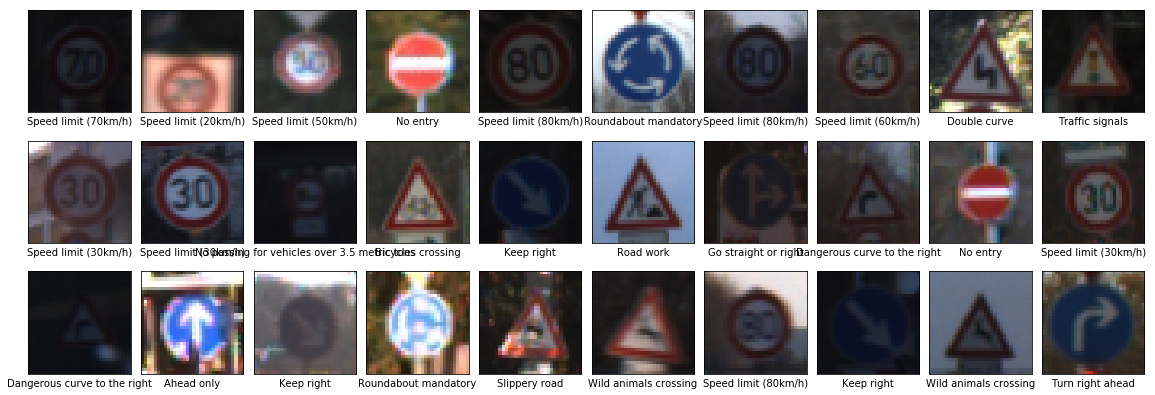

In [8]:
def plot_images(images, labels, pred=None):
    assert len(images) == len(labels) == 30
    
    # Create figure with 3x10 sub-plots.
    fig, axes = plt.subplots(3, 10, figsize=(20,7))
    fig.subplots_adjust(hspace=0.1, wspace=0.1)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i]) 

        # Show true and predicted classes.
        if pred is None:
            xlabel = "{0}".format(labels[i])
        else:
            xlabel = "{0} -> {1}".format(labels[i], pred[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
indexes = random.sample(range(0, n_train),30)
images = [X_train[index].squeeze() for index in indexes]
#labels = [train['labels'][index] for index in indexes]
labels = [df[df['ClassId']==y_train[index]]['SignName'].item() for index in indexes]

plot_images(images, labels)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
def gray_scale(X):
    X = 0.299 * X[:, :, :, 0] + 0.587 * X[:, :, :, 1] + 0.114 * X[:, :, :, 2]
    X = X.reshape(X.shape + (1,))
    return X

def normalize_image(image_data):
    """
    Normalize the image data with (pixel - 128)/ 128
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    return (image_data - 128)/ 128

In [8]:
X_train = normalize_image(gray_scale(X_train))
X_valid = normalize_image(gray_scale(X_valid))
X_test = normalize_image(gray_scale(X_test))

### Model Architecture

In [11]:
### Define your architecture here.
import tensorflow as tf
from sklearn.utils import shuffle
from tensorflow.contrib.layers import flatten

def LeNet_deep_gray(x, keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 32x32x32.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 1, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='SAME') + conv1_b
    # Activation.
    conv1 = tf.nn.relu(conv1)
    # pooling. Input = 32x32x32. Output = 16x16x32.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    # Layer 2: Convolutional. Output = 16x16x32.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 32, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='SAME') + conv2_b    
    # Activation.
    conv2 = tf.nn.relu(conv2)
    # pooling. Input = 16x16x32. Output = 8x8x32.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
    # Layer 3: Convolutional. Output = 8x8x32.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 32, 32), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(32))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='SAME') + conv3_b    
    # Activation.
    conv3 = tf.nn.relu(conv3)
    # Dropout
    conv3 = tf.nn.dropout(conv3, keep_prob)
    
    # Layer 4: Convolutional. Output = 8x8x32.
    conv4_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 32, 32), mean = mu, stddev = sigma))
    conv4_b = tf.Variable(tf.zeros(32))
    conv4   = tf.nn.conv2d(conv3, conv4_W, strides=[1, 1, 1, 1], padding='SAME') + conv4_b    
    # Activation.
    conv4 = tf.nn.relu(conv4)
    # Dropout
    conv4 = tf.nn.dropout(conv4, keep_prob)    
    
    # Flatten. Input = 8x8x32. Output = 2048.
    fc0   = flatten(conv4)
    
    # Layer 6: Fully Connected. Input = 2048. Output = 128.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(2048, 128), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(128))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    # Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # Layer 7: Fully Connected. Input = 128. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(128, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b    
    #Activation.
    fc2    = tf.nn.relu(fc2)
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # Layer 8: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [12]:
def plot_train_valid_accuracies(training_acc, validation_acc):
    fig, ax = plt.subplots()
    ax.plot(range(len(training_acc)), training_acc, label="Training Accuracy")
    ax.plot(range(len(validation_acc)), validation_acc, label="Validation Accuracy")
    
    ax.set_xlabel('Training steps')
    ax.set_ylabel('Accuracy')
    ax.set_title('Training vs. Validation Accuracy')
    ax.legend(loc=4)
    ax.set_ylim([0,1])
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.grid(True)
    plt.show()

In [4]:
def evaluate(X_data, y_data, accuracy_operation, x, y, keep_prob):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [17]:
def train_gray(EPOCHS, BATCH_SIZE, learning_rate, kp, X_train, y_train, X_valid, y_valid, is_save=False):
    # input placeholders    
    x = tf.placeholder(tf.float32, (None, 32, 32, 1),name='x')
    y = tf.placeholder(tf.int32, (None),name='y')
    one_hot_y = tf.one_hot(y, 43)    
    keep_prob = tf.placeholder(tf.float32,name='keep_prob') # dropout
    
    # Model
    logits = LeNet_deep_gray(x, keep_prob)
    # Name logits Tensor, so that is can be loaded from disk after training
    logits = tf.identity(logits, name='logits')
    
    # Define loss and training operations
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
    loss_operation = tf.reduce_mean(cross_entropy,name='loss')
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
    training_operation = optimizer.minimize(loss_operation)
   
    # Create operations to test accuracy
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32),name='accuracy')
    
    if is_save:
        saver = tf.train.Saver()
    
    # Train and test the network
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())        
        num_examples = len(X_train)
        
        train_accs = []
        valid_accs = []
    
        print("Training...")
        print()
        
        for i in range(EPOCHS):
            X_train, y_train = shuffle(X_train, y_train)
            total_accuracy = 0
            total_loss = 0
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]                
                #sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: kp})
                _,loss = sess.run([training_operation,loss_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: kp})
                # add a training accuracy
                accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
                total_accuracy += (accuracy * len(batch_x))
                total_loss += loss
            
            training_accuracy = total_accuracy/num_examples
            train_accs.append(training_accuracy)
            
            # At the end, score the final accuracy for both the validation and test sets
            validation_accuracy = evaluate(X_valid, y_valid,accuracy_operation, x, y, keep_prob)
            valid_accs.append(validation_accuracy)
            
            print("EPOCH {}: Training Accuracy = {:.3f} -- Validation Accuracy = {:.3f} -- Loss = {:.3f}"
                  .format(i+1,training_accuracy,validation_accuracy,total_loss/num_examples))
        
        # Plotting
        plot_train_valid_accuracies(train_accs, valid_accs)
        
        if is_save: 
            saver.save(sess, './model/Model')
            print("Model saved")

Training...

EPOCH 1: Training Accuracy = 0.172 -- Validation Accuracy = 0.408 -- Loss = 0.025
EPOCH 2: Training Accuracy = 0.624 -- Validation Accuracy = 0.740 -- Loss = 0.014
EPOCH 3: Training Accuracy = 0.844 -- Validation Accuracy = 0.860 -- Loss = 0.008
EPOCH 4: Training Accuracy = 0.913 -- Validation Accuracy = 0.884 -- Loss = 0.005
EPOCH 5: Training Accuracy = 0.944 -- Validation Accuracy = 0.929 -- Loss = 0.004
EPOCH 6: Training Accuracy = 0.963 -- Validation Accuracy = 0.929 -- Loss = 0.004
EPOCH 7: Training Accuracy = 0.971 -- Validation Accuracy = 0.947 -- Loss = 0.003
EPOCH 8: Training Accuracy = 0.977 -- Validation Accuracy = 0.954 -- Loss = 0.003
EPOCH 9: Training Accuracy = 0.981 -- Validation Accuracy = 0.955 -- Loss = 0.002
EPOCH 10: Training Accuracy = 0.984 -- Validation Accuracy = 0.962 -- Loss = 0.002


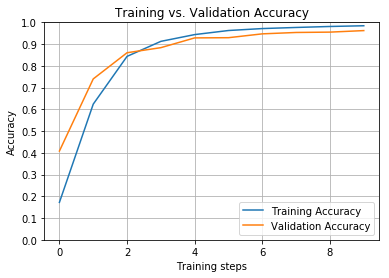

In [35]:
EPOCHS = 10
BATCH_SIZE = 128
learning_rate = 0.001
kp = 0.6

tf.reset_default_graph()
with tf.Graph().as_default():
    train_gray(EPOCHS, BATCH_SIZE, learning_rate, kp, X_train, y_train, X_valid, y_valid)

Training...

EPOCH 1: Training Accuracy = 0.252 -- Validation Accuracy = 0.472 -- Loss = 0.024
EPOCH 2: Training Accuracy = 0.704 -- Validation Accuracy = 0.765 -- Loss = 0.012
EPOCH 3: Training Accuracy = 0.868 -- Validation Accuracy = 0.846 -- Loss = 0.007
EPOCH 4: Training Accuracy = 0.918 -- Validation Accuracy = 0.878 -- Loss = 0.005
EPOCH 5: Training Accuracy = 0.941 -- Validation Accuracy = 0.905 -- Loss = 0.004
EPOCH 6: Training Accuracy = 0.955 -- Validation Accuracy = 0.907 -- Loss = 0.003
EPOCH 7: Training Accuracy = 0.967 -- Validation Accuracy = 0.923 -- Loss = 0.003
EPOCH 8: Training Accuracy = 0.975 -- Validation Accuracy = 0.938 -- Loss = 0.003
EPOCH 9: Training Accuracy = 0.979 -- Validation Accuracy = 0.944 -- Loss = 0.002
EPOCH 10: Training Accuracy = 0.983 -- Validation Accuracy = 0.958 -- Loss = 0.002
EPOCH 11: Training Accuracy = 0.986 -- Validation Accuracy = 0.951 -- Loss = 0.002
EPOCH 12: Training Accuracy = 0.987 -- Validation Accuracy = 0.954 -- Loss = 0.002


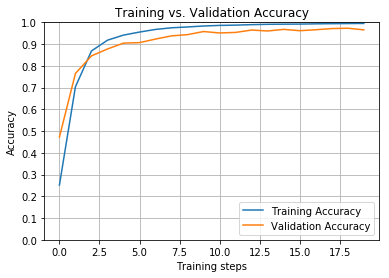

Model saved


In [18]:
EPOCHS = 20
BATCH_SIZE = 128
learning_rate = 0.001
kp = 0.6

tf.reset_default_graph()
with tf.Graph().as_default():
    train_gray(EPOCHS, BATCH_SIZE, learning_rate, kp, X_train, y_train, X_valid, y_valid, True)

### Test the Model

In [19]:
def test(save_model_path):
    loaded_graph = tf.Graph()
    with tf.Session(graph=loaded_graph) as sess:
        # load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')    
        loader.restore(sess, save_model_path)
        
        # Get tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
    
        test_accuracy = evaluate(X_test, y_test,loaded_acc, loaded_x, loaded_y, loaded_keep_prob)
        print("Test Accuracy = {:.3f}".format(test_accuracy))

In [22]:
save_model_path = './model/Model'
test(save_model_path)

INFO:tensorflow:Restoring parameters from ./model/Model
Test Accuracy = 0.951


In [1]:
import tensorflow as tf

In [11]:
def test(save_model_path):
    loaded_graph = tf.Graph()
    with tf.Session(graph=loaded_graph) as sess:
        # load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')    
        loader.restore(sess, save_model_path)
        
        # Get tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
    
        test_accuracy = evaluate(X_test, y_test,loaded_acc, loaded_x, loaded_y, loaded_keep_prob)
        print("Test Accuracy = {:.3f}".format(test_accuracy))

In [13]:
BATCH_SIZE = 128
save_model_path = './model/Model'
test(save_model_path)

Test Accuracy = 0.951


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Test Images Visualization

In [36]:
def plot_test_images(images,n):
    assert len(images) <= 10    
    fig, axes = plt.subplots(1, n, figsize=(10,5))
    fig.subplots_adjust(hspace=0.1, wspace=0.1)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i])       
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])

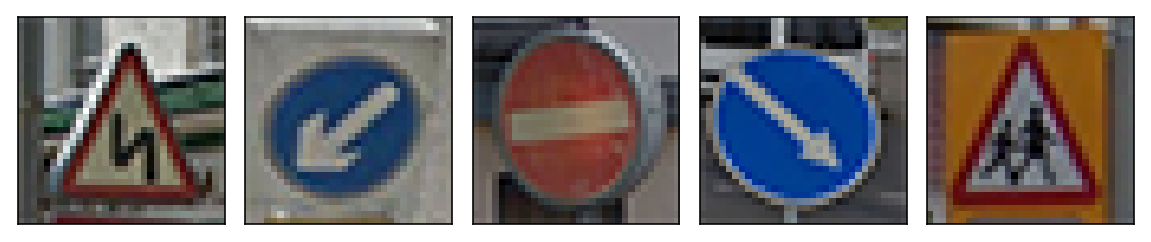

In [37]:
plot_test_images(imgs,5)

### Preprocess Test Images

In [18]:
### Load the images
from skimage import io
X_ = np.empty([0, 32, 32, 3], dtype = np.int32)
for i in range(5):
    image = io.imread('test/test{}.png'.format(i + 1))
    X_ = np.append(X_, [image[:, :, :3]], axis = 0)

In [38]:
## gray scale and normalize
def gray_scale(X):
    X = 0.299 * X[:, :, :, 0] + 0.587 * X[:, :, :, 1] + 0.114 * X[:, :, :, 2]
    X = X.reshape(X.shape + (1,))
    return X
def normalize_image(image_data):
    return (image_data - 128)/ 128

In [39]:
X_ = normalize_image(gray_scale(X_))

### Predict the Sign Type for Each Image

In [42]:
save_model_path = './model/Model'
top_n = 5
loaded_graph = tf.Graph()
with tf.Session(graph=loaded_graph) as sess:
    # load model
    loader = tf.train.import_meta_graph(save_model_path + '.meta')    
    loader.restore(sess, save_model_path)
    
    # Get tensors from loaded model
    loaded_x = loaded_graph.get_tensor_by_name('x:0')
    loaded_y = loaded_graph.get_tensor_by_name('y:0')
    loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
    loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
    loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
    
    test_predictions = sess.run(tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n),
                                feed_dict={loaded_x: X_,  loaded_keep_prob: 1.0})

### Display the prediction

In [58]:
import pandas as pd
df = pd.read_csv('signnames.csv')

In [110]:
def display_image_predictions(imgs, predictions, df):
    
    fig, axies = plt.subplots(nrows=5, ncols=2, figsize=(15,8))
    #fig.tight_layout()
    fig.suptitle('Softmax Predictions', fontsize=20, y=1.0)
    fig.subplots_adjust(hspace=0.4, wspace=0.1)

    n_predictions = 5
    margin = 0.05
    ind = np.arange(n_predictions)
    width = (1. - 2. * margin) / n_predictions

    for i, (img, pred_indicies, pred_values) in enumerate(zip(imgs, predictions.indices, predictions.values)):
        pred_names = [df[df['ClassId']==pred_i]['SignName'].item() for pred_i in pred_indicies]

        axies[i][0].imshow(img.reshape(32,32))
        #axies[i][0].set_title(correct_name)
        axies[i][0].set_axis_off()

        axies[i][1].barh(ind + margin, pred_values[::-1], width)
        axies[i][1].set_yticks(ind + margin)
        axies[i][1].set_yticklabels(pred_names[::-1])
        axies[i][1].set_xticks([0, 0.5, 1.0])

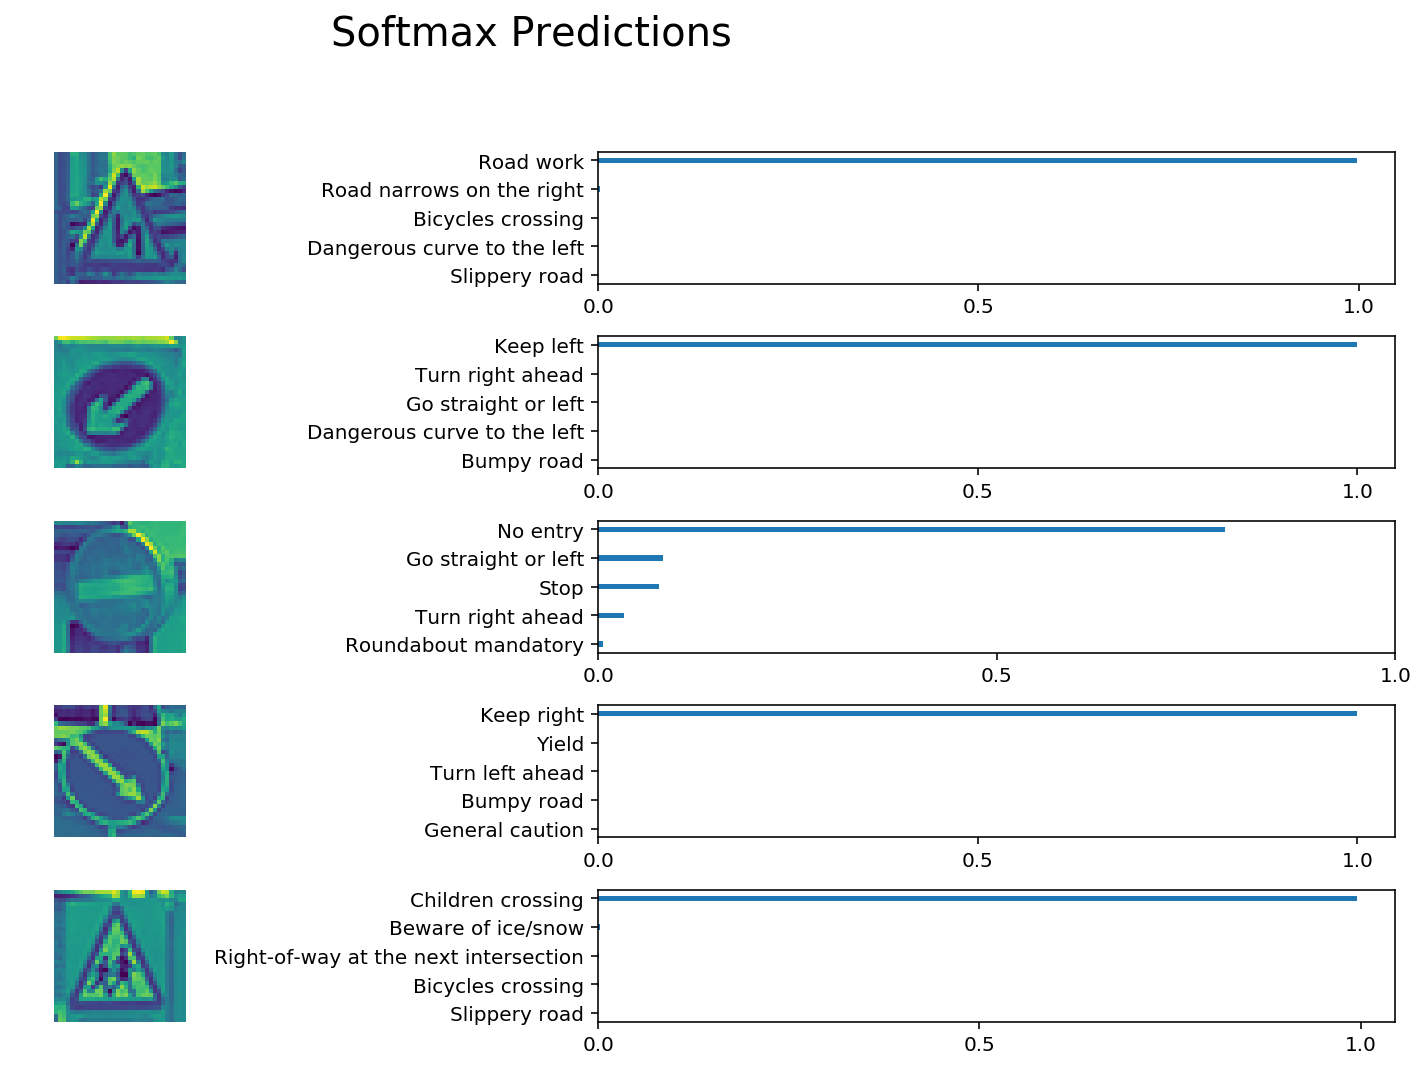

In [111]:
display_image_predictions(X_,test_predictions,df)

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")